В датасете представлен набор данных из 9 атрибутов: возраст бетона и материалы используемых для того чтобы создать его. <br>
cement      1030 non-null float64<br>
slag        1030 non-null float64<br>
ash         1030 non-null float64<br>
water       1030 non-null float64<br>
splast      1030 non-null float64<br>
coarse      1030 non-null float64<br>
fine        1030 non-null float64<br>
age         1030 non-null int64<br>
strength    1030 non-null float64<br>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 

from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split

from yellowbrick.regressor import AlphaSelection, PredictionError, ResidualsPlot

mpl.rcParams['figure.figsize'] = (9,6)

%matplotlib inline

In [24]:
df = pd.read_csv('cement.csv')
 
    
# Переименуем столбцы
df.columns = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age', 'strength']
# Извлечение данных силы цемента X и y из фрейма данных
X = df.drop('strength', axis=1)
y = df['strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
df.head()

,cement,slag,ash,water,splast,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement      1030 non-null float64
slag        1030 non-null float64
ash         1030 non-null float64
water       1030 non-null float64
splast      1030 non-null float64
coarse      1030 non-null float64
fine        1030 non-null float64
age         1030 non-null int64
strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


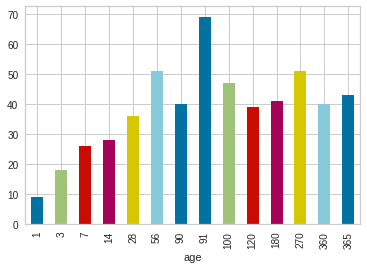

In [33]:
#средняя сила на возраст
age_s = df.groupby('age')['strength'].mean().astype(int)
age_s.plot.bar()

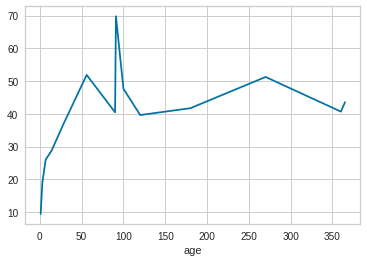

In [37]:
#средняя сила на возраст
age_s = df.groupby('age')['strength'].mean()
age_s.plot()

In [13]:
#График Остатков
#Остаток - это разница между наблюдаемым значением целевой переменной (y) и прогнозируемым значением (ŷ),
#т. е. ошибка прогноза.
#Визуализатор ResidualsPlot показывает разницу между остатками на вертикальной оси и зависимой переменной на горизонтальной оси,
#что позволяет обнаруживать области в пределах целевого объекта, которые могут быть подвержены большей или меньшей ошибке.

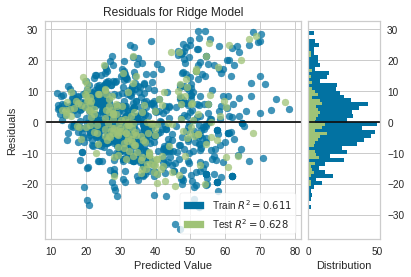

In [14]:
# Создание экземпляра линейной модели и визуализатора
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Вставка данных в визуализатор
visualizer.score(X_test, y_test)  # Оценка модели на тестовых данных 
g = visualizer.poof()             

In [ ]:
#Визуализатор ошибок прогнозирования
#Yellowbrick строит фактические целевые объекты из набора данных относительно прогнозируемых значений, созданных моделью.
#Это позволяет нам видеть, разброс(дисперсию) в модели. 
#С помощью этого графика можно диагностировать регрессионные модели путем сравнения с линией 45 градусов,
#где прогноз точно соответствует модели.

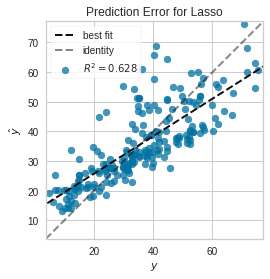

In [9]:
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test) 
g = visualizer.poof()            

In [ ]:
#Визуализатор Выделения Альфа
#Визуализатор AlphaSelection демонстрирует, как различные значения Альфа влияют на выбор модели при регуляризации линейных моделей. 
#Важно выбрать оптимальную Альфа таким образом, чтобы ошибка была минимизирована в обоих направлениях.

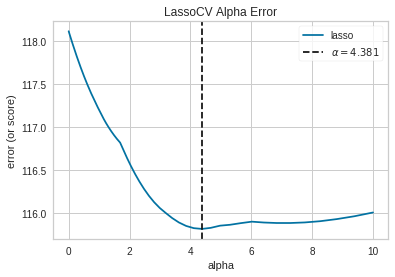

In [16]:
# Создание списка Альф для перекрестной проверки
alphas = np.logspace(-10, 1, 400)

# Создание линейной модели и визуализатора
model = LassoCV(alphas=alphas, cv=3)
visualizer = AlphaSelection(model)

visualizer.fit(X, y)              
g = visualizer.poof()             